# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [2]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [3]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here


header = next(lines)     #to avoid first row ['km' 'year' 'powerPS' 'avgPrice']

dataset = list(lines)


#for i in range(len(dataset)):
  #  dataset[i] = [float(x) for x in dataset[i]]   
#np.array(dataset)


dataset = np.array(dataset).astype(float)
print(header)
print(dataset)
print(len(dataset))

['km', 'year', 'powerPS', 'avgPrice']
[[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]
1297


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




Slope is =  1509.0938253352235
Intercept is =  -3018309.484956963
R correlation from the regression by Year value is =  0.6767043169095447


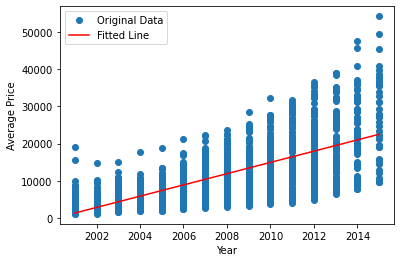

In [10]:
# linear regression with linregress (estimate price from year)

# your code.....

#slope, intercept, r, p, se = stats.linregress(x, y)    GENERAL

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html



#YEAR

slope, intercept, r_year , _, _ = stats.linregress(dataset[:,1], dataset[:,-1])

print("Slope is = " , slope)
print("Intercept is = " , intercept)
print("R correlation from the regression by Year value is = " , r_year)

plt.plot(dataset[:,1], dataset[:,-1], "o" , label="Original Data")
plt.plot(dataset[:,1],intercept + slope*dataset[:,1] , "r" , label ="Fitted Line")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

Slope for year is =  1509.0938253352197
Intercept is =  -3018309.484956955


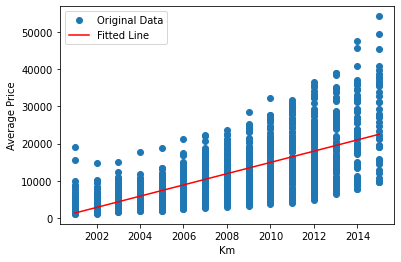

In [57]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# your code.....

#Year

X=np.zeros((len(dataset),1))
X[:,0]= dataset[:,1]
y=np.array( dataset[:,-1]  )


reg = linear_model.LinearRegression()
reg.fit( X , y )
        

print("Slope for year is = " , reg.coef_[0])
print("Intercept is = " , reg.intercept_)


        
plt.plot(X, y, "o" , label="Original Data")
plt.plot(X, reg.intercept_ + (reg.coef_[0]*X[:,0]), "r" , label ="Fitted Line")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()





Slope for year is =  1509.0938253351871
Intercept is =  -3018309.48495689
R correlation from the regression by Year value is =  0.6767043169095365


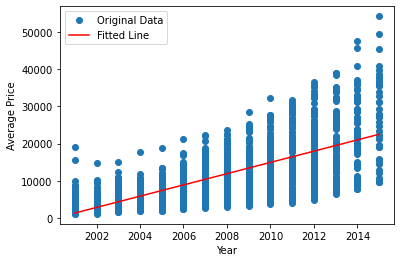

In [6]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

#Year - LEAST SQUARES

x=np.array( dataset[:,1])
y=np.array( dataset[:,-1])

mean_x = np.mean(x)
mean_y = np.mean(y)

var_x, var_y , cov_xy = 0,0,0

for i in range(len(x)):
    var_x += (x[i] - mean_x)**2
    var_y += (y[i] - mean_y)**2
    cov_xy += (x[i] - mean_x) * (y[i] - mean_y)

m = (cov_xy/var_x)
q = mean_y - (m*mean_x)
r = cov_xy / ((var_x)**(1/2) * (var_y)**(1/2) )
    
    
print("Slope for year is = " , m)
print("Intercept is = " , q)
print("R correlation from the regression by Year value is = " , r)


        
plt.plot(x, y, "o" , label="Original Data")
plt.plot(x, q + (m*x), "r" , label ="Fitted Line")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()



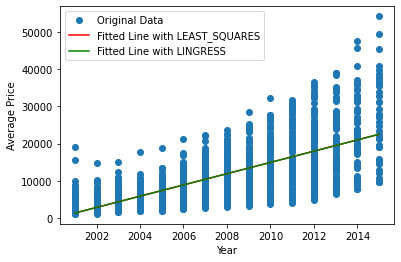

In [9]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....




x=np.array( dataset[:,1])
y=np.array( dataset[:,-1])




#LINGRESS


slope, intercept, r_year , _, _ = stats.linregress(x, y)


#_______________________________________________#

#LEAST SQUARES

mean_x = np.mean(x)
mean_y = np.mean(y)

var_x, var_y , cov_xy = 0,0,0

for i in range(len(x)):
    var_x += (x[i] - mean_x)**2
    var_y += (y[i] - mean_y)**2
    cov_xy += (x[i] - mean_x) * (y[i] - mean_y)

m = (cov_xy/var_x)
q = mean_y - (m*mean_x)
r = cov_xy / ((var_x)**(1/2) * (var_y)**(1/2) )


#_______________________________________________#



#PLOT



plt.plot(x, y, "o" , label="Original Data")
plt.plot(x, q + (m*x), "r" , label ="Fitted Line with LEAST_SQUARES")
plt.plot(x, intercept + (slope*x), "g" , label ="Fitted Line with LINGRESS")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()


Slope is =  90.33080718820236
Intercept is =  -1303.9126989880006
R correlation from the regression by Power value is =  0.708550031526397


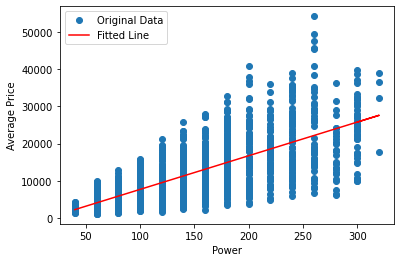

In [11]:
# linear regression with linregress (estimate price from power)

# your code.....

#POWER

slope, intercept, r_pow , _, _ = stats.linregress(dataset[:,2], dataset[:,-1])

print("Slope is = " , slope)
print("Intercept is = " , intercept)
print("R correlation from the regression by Power value is = " , r_pow)

plt.plot(dataset[:,2], dataset[:,-1], "o" , label="Original Data")
plt.plot(dataset[:,2],intercept + slope*dataset[:,2] , "r" , label ="Fitted Line")
plt.legend()
plt.xlabel("Power")
plt.ylabel("Average Price")
plt.show()

Slope is =  -0.05425151330972561
Intercept is =  16692.345302519734
R correlation from the regression by Km value is =  -0.2572867429988496


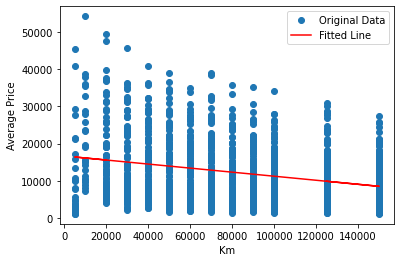

In [12]:
# linear regression with linregress (estimate price from km)

# your code...


#KM

slope, intercept, r_km , _, _ = stats.linregress(dataset[:,0], dataset[:,-1])

print("Slope is = " , slope)
print("Intercept is = " , intercept)
print("R correlation from the regression by Km value is = " , r_km)

plt.plot(dataset[:,0], dataset[:,-1], "o" , label="Original Data")
plt.plot(dataset[:,0],intercept + slope*dataset[:,0] , "r" , label ="Fitted Line")
plt.legend()
plt.xlabel("Km")
plt.ylabel("Average Price")
plt.show()



In [14]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......


print("R correlation from the regression by Year value is = " , r_year)

print("R correlation from the regression by Km value is = " , r_km)

print("R correlation from the regression by Power value is = " , r_pow)

print("\n \n The best correlation is the one that correlates the average price by Power ", "\n " ," in fact r ", r_pow , "is the closest to +1")



R correlation from the regression by Year value is =  0.6767043169095447
R correlation from the regression by Km value is =  -0.2572867429988496
R correlation from the regression by Power value is =  0.708550031526397

 
 The best correlation is the one that correlates the average price by Power  
   in fact r  0.708550031526397 is the closest to +1


Slope for year is =  1325.228400404633
Slope for power is =  80.43004468885395
Intercept is =  -2661196.7867490062
R correlation from the 2D regression by Year and Power is =  0.9214943735217701

 
 Equation 2D 
  Avg. Price =  -2661196.7867490062  +   (  1325.228400404633  * Year   +  80.43004468885395  * Power )


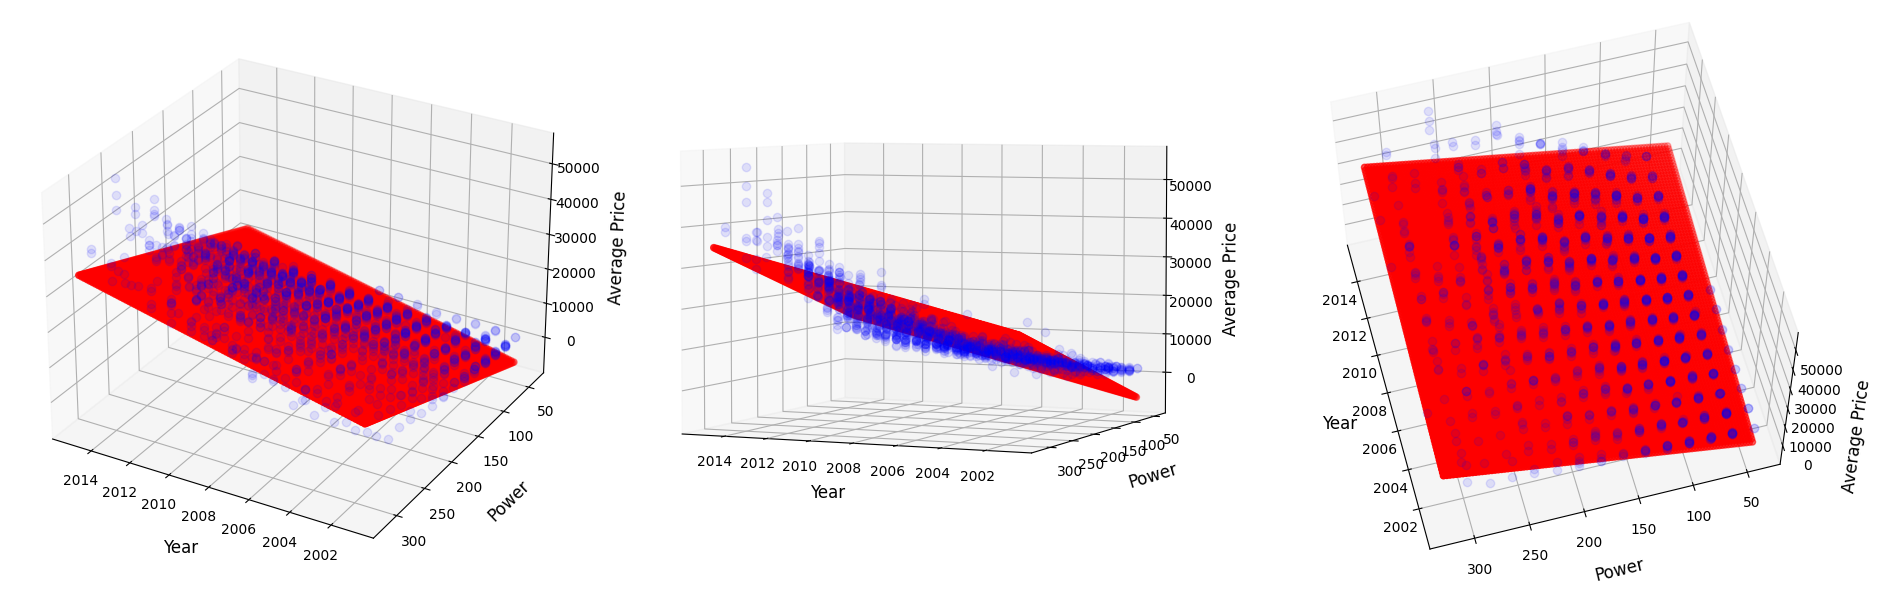

In [14]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......

from mpl_toolkits.mplot3d import Axes3D



#Year & POWER

X=np.array( dataset[:,1:3] )
y=np.array( dataset[:,-1]  )

x_pred = np.linspace(X[:,0].min() , X[:,0].max() , 100)
y_pred = np.linspace(X[:,1].min() , X[:,1].max() , 100)
xx_pred , yy_pred = np.meshgrid(x_pred, y_pred)

model_viz = np.array([xx_pred.flatten() , yy_pred.flatten()]).T



reg = linear_model.LinearRegression()
model =reg.fit( X , y )
predicted = model.predict(model_viz)

r_square = model.score(X , y)


print("Slope for year is = " , reg.coef_[0])
print("Slope for power is = " , reg.coef_[1])
print("Intercept is = " , reg.intercept_)
print("R correlation from the 2D regression by Year and Power is = " , r_square**(1/2))

print ("\n \n Equation 2D \n  Avg. Price = " , reg.intercept_ , " + " , " ( " , reg.coef_[0] , " * Year " , " + ", reg.coef_[1] , " * Power )")


plt.style.use("default")

fig = plt.figure(figsize=(19,6))

ax1= plt.subplot(1,3,1, projection="3d")
ax2= plt.subplot(1,3,2, projection="3d")
ax3= plt.subplot(1,3,3, projection="3d")

axes = [ax1 , ax2, ax3]

for ax in axes:
    ax.plot(X[:,0],X[:,1],y, color="blue" , linestyle="None", zorder=3 , marker="o" , alpha=0.1)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted , s=20, color="red")
    ax.set_xlabel("Year", fontsize=12, labelpad=10)
    ax.set_ylabel("Power", fontsize=12, labelpad=10)
    ax.set_zlabel("Average Price", fontsize=12, labelpad=10)
    ax.locator_params(tight=True , nbins="auto")

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)


fig.tight_layout()

